<a href="https://colab.research.google.com/github/ijazahmad-star/Colab-Workspace/blob/main/LangGraph.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install --pre -U langgraph

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 155.2/155.2 kB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.8/45.8 kB 1.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.8/56.8 kB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.6/207.6 kB 11.7 MB/s eta 0:00:00


In [2]:
from langgraph.graph import StateGraph
from typing import TypedDict

In [3]:
class AgentState(TypedDict):
    message: str

def Greeting(state: AgentState) -> str:
  state['message'] = 'Hello World ' + state['message']
  return state

graph = StateGraph(AgentState)

graph.add_node("Greeting", Greeting)
graph.set_entry_point('Greeting')
graph.set_finish_point('Greeting')
app = graph.compile()

In [4]:
res = app.invoke({"message":"bob"})
res['message']

'Hello World bob'

In [5]:
import math
from langgraph.graph import StateGraph
from typing import TypedDict, List

class AgentState(TypedDict):
    name: str
    values: List
    operator: str
    result: str

def processor(state: AgentState) -> AgentState:
  if state['operator'] == '+':
    state['result'] = f"Hi, {state['name']} your values sum is {sum(state['values'])}."
  if state['operator'] == '*':
    state['result'] = f"Hi, {state['name']} your values multiplication result is {math.prod(state['values'])}."
  return state

graph = StateGraph(AgentState)

graph.add_node("processor", processor)
graph.set_entry_point('processor')
graph.set_finish_point('processor')
app = graph.compile()

result = app.invoke({"name":"bob", "values":[1,2,3], "operator":"*"})
result['result']

'Hi, bob your values multiplication result is 6.'

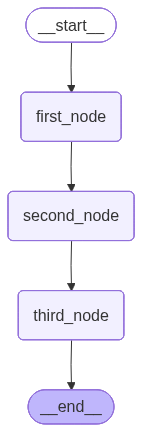

'Hi, bob. You are 25 years old. You have the following skills: python, javascript.'

In [6]:
from langgraph.graph import StateGraph
from typing import TypedDict, List

class AgentState(TypedDict):
    name: str
    age: str
    skills: List
    result: str

def first_node(state: AgentState) -> AgentState:
  state['result'] = f"Hi, {state['name']}."
  return state

def second_node(state: AgentState) -> AgentState:
  state['result'] = state['result'] + f" You are {state['age']} years old."
  return state

def third_node(state: AgentState) -> AgentState:
  state['result'] = state['result'] + f" You have the following skills: {', '.join(state['skills'])}."
  return state


graph = StateGraph(AgentState)

graph.add_node("first_node", first_node)
graph.add_node("second_node", second_node)
graph.add_node("third_node", third_node)

graph.set_entry_point('first_node')
graph.add_edge('first_node', 'second_node')
graph.add_edge('second_node', 'third_node')
graph.set_finish_point('third_node')

app = graph.compile()

from IPython.display import Image, display
display(Image(app.get_graph().draw_mermaid_png()))

result = app.invoke({"name":"bob", "age":"25", "skills":["python", "javascript"]})
result['result']


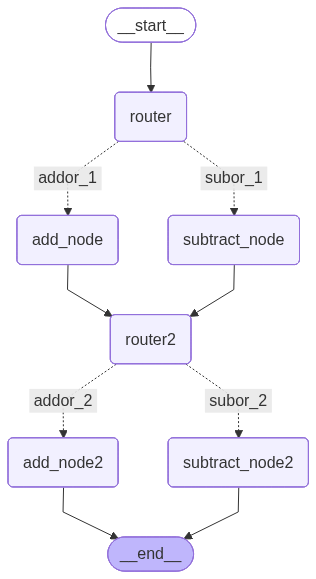

In [7]:
from langgraph.graph import StateGraph, START, END
from typing import TypedDict

class AgentState(TypedDict):
  num1: int
  oper1: str
  num2: int
  final1: int
  num3: int
  oper2: str
  num4: int
  int4: int
  final2: int


def add1(state: AgentState) -> AgentState:
  state['final1'] = state['num1'] + state['num2']
  return state

def sub1(state: AgentState) -> AgentState:
  state['final1'] = state['num1'] - state['num2']
  return state

def add2(state: AgentState) -> AgentState:
  state['final2'] = state['num3'] + state['num4']
  return state

def sub2(state: AgentState) -> AgentState:
  state['final2'] = state['num3'] - state['num4']
  return state

def decide_next_node1(state: AgentState) -> AgentState:
  if state['oper1'] == '+':
    return "addor_1"
  elif state['oper1'] == '-':
    return "subor_1"

def decide_next_node2(state: AgentState) -> AgentState:
  if state['oper2'] == '+':
    return "addor_2"
  elif state['oper2'] == '-':
    return "subor_2"


graph = StateGraph(AgentState)

graph.add_node("add_node", add1)
graph.add_node("subtract_node", sub1)
graph.add_node("router", lambda state:state)

graph.add_node("add_node2", add2)
graph.add_node("subtract_node2", sub2)
graph.add_node("router2", lambda state:state)


graph.add_edge(START, "router")

graph.add_conditional_edges(
    "router",
    decide_next_node1,
    {
        # Edge: Node format
        "addor_1": "add_node",
        "subor_1": "subtract_node"
    }
)


graph.add_edge("add_node", "router2")
graph.add_edge("subtract_node", "router2")

graph.add_conditional_edges(
    "router2",
    decide_next_node2,
    {
        # Edge: Node format
        "addor_2": "add_node2",
        "subor_2": "subtract_node2"
    }
)


graph.add_edge("add_node2", END)
graph.add_edge("subtract_node2", END)

app = graph.compile()

from IPython.display import Image, display
display(Image(app.get_graph().draw_mermaid_png()))

In [8]:
initial_state = AgentState(num1 = 10, oper1="-", num2 = 5, num3 = 7, num4=2, oper2="+", final1= 0, final2 = 0)

In [9]:
print(app.invoke(initial_state))

{'num1': 10, 'oper1': '-', 'num2': 5, 'final1': 5, 'num3': 7, 'oper2': '+', 'num4': 2, 'final2': 9}


## G5

In [10]:
from langgraph.graph import StateGraph, END
import random
from typing import Dict, List, TypedDict

In [11]:
class GameState(TypedDict):
    player_name: str
    target_number: int
    guesses: List[int]
    attempts: int
    hint: str
    lower_bound: int
    upper_bound: int

In [12]:
def setup_node(state: GameState) -> GameState:
    """Initialize the game with a random target number"""
    state["player_name"] = f"Welcome, {state['player_name']}!"
    state["target_number"] = random.randint(1, 20)
    state["guesses"] = []
    state["attempts"] = 0
    state["hint"] = "Game started! Try to guess the number."
    state["lower_bound"] = 1
    state["upper_bound"] = 20
    print(f"{state['player_name']} The game has begun. I'm thinking of a number between 1 and 20.")
    return state

In [13]:
def guess_node(state: GameState) -> GameState:
    """Generate a smarter guess based on previous hints"""

    possible_guesses = [i for i in range(state["lower_bound"], state["upper_bound"] + 1) if i not in state["guesses"]]
    if possible_guesses:
        guess = random.choice(possible_guesses)
    else:

        guess = random.randint(state["lower_bound"], state["upper_bound"])

    state["guesses"].append(guess)
    state["attempts"] += 1
    print(f"Attempt {state['attempts']}: Guessing {guess} (Current range: {state['lower_bound']}-{state['upper_bound']})")
    return state

In [14]:
def hint_node(state: GameState) -> GameState:
    """Here we provide a hint based on the last guess and update the bounds"""
    latest_guess = state["guesses"][-1]
    target = state["target_number"]

    if latest_guess < target:
        state["hint"] = f"The number {latest_guess} is too low. Try higher!"

        state["lower_bound"] = max(state["lower_bound"], latest_guess + 1)
        print(f"Hint: {state['hint']}")

    elif latest_guess > target:
        state["hint"] = f"The number {latest_guess} is too high. Try lower!"

        state["upper_bound"] = min(state["upper_bound"], latest_guess - 1)
        print(f"Hint: {state['hint']}")
    else:
        state["hint"] = f"Correct! You found the number {target} in {state['attempts']} attempts."
        print(f"Success! {state['hint']}")

    return state

In [15]:
def should_continue(state: GameState) -> str:
    """Determine if we should continue guessing or end the game"""

    # There are 2 end conditions - either 7 is reached or the correct number is guessed

    latest_guess = state["guesses"][-1]
    if latest_guess == state["target_number"]:
        print(f"GAME OVER: Number found!")
        return "end"
    elif state["attempts"] >= 7:
        print(f"GAME OVER: Maximum attempts reached! The number was {state['target_number']}")
        return "end"
    else:
        print(f"CONTINUING: {state['attempts']}/7 attempts used")
        return "continue"

In [16]:
graph = StateGraph(GameState)
graph.add_node("setup", setup_node)
graph.add_node("guess", guess_node)
graph.add_node("hint_node", hint_node)


graph.add_edge("setup", "guess")
graph.add_edge("guess", "hint_node")


graph.add_conditional_edges(
    "hint_node",
    should_continue,
    {
        "continue": "guess",
        "end": END
    }
)

graph.set_entry_point("setup")
app = graph.compile()


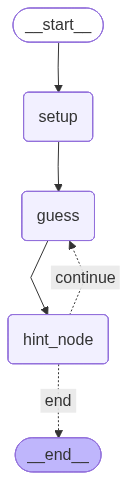

In [17]:
from IPython.display import Image, display
display(Image(app.get_graph().draw_mermaid_png()))

In [18]:
result = app.invoke({"player_name": "Student", "guesses": [], "attempts": 0, "lower_bound": 1, "upper_bound": 20})

Welcome, Student! The game has begun. I'm thinking of a number between 1 and 20.
Attempt 1: Guessing 16 (Current range: 1-20)
Hint: The number 16 is too high. Try lower!
CONTINUING: 1/7 attempts used
Attempt 2: Guessing 2 (Current range: 1-15)
Hint: The number 2 is too low. Try higher!
CONTINUING: 2/7 attempts used
Attempt 3: Guessing 4 (Current range: 3-15)
Hint: The number 4 is too low. Try higher!
CONTINUING: 3/7 attempts used
Attempt 4: Guessing 10 (Current range: 5-15)
Hint: The number 10 is too high. Try lower!
CONTINUING: 4/7 attempts used
Attempt 5: Guessing 8 (Current range: 5-9)
Hint: The number 8 is too high. Try lower!
CONTINUING: 5/7 attempts used
Attempt 6: Guessing 7 (Current range: 5-7)
Success! Correct! You found the number 7 in 6 attempts.
GAME OVER: Number found!
